In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

## 데이터 수집 및 탐색

In [4]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [5]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
raw = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df = raw.copy()
print(df.shape)
df.head(2)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [9]:
df['diagnosis'] = cancer.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 정규화

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# 평균 0, 분산(표준편차) 1 >> 정규분포를 띄게 만들어
scaler = StandardScaler()

cancer_scaled = scaler.fit_transform(cancer.data)
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

## 분석 모델 구축
* 로지스틱회귀 이용 >> 이진 분류 (0, 1 분류)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
# 독립변수, 종속변수 구분 (x, y 설정)
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [16]:
X = cancer_scaled
y = df.diagnosis

In [17]:
# 훈련, 평가용 데이터 분할
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# 모델 생성
lr = LogisticRegression()

In [20]:
# 모델 훈련 (훈련 데이터 >> 모델 학습)
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
# 평가 데이터  (X_test)에 대한 예측 수행
# >> 예측 결과 y_pred
# >> 실제 값인 y_test 비교
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [23]:
# 혼동 행렬
confusion_matrix(y_test, y_pred)

array([[ 62,   1],
       [  2, 106]], dtype=int64)

In [24]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [25]:
print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, f1 : {3:.3f}'.format(acc, precision, recall, f1))

정확도 : 0.982, 정밀도 : 0.991, 재현율 : 0.981, f1 : 0.986


In [27]:
print('ROC_AUC : {0:.3f}'.format(roc_auc))

ROC_AUC : 0.983


# 의사결정나무 DecisionTree

## 텍스트 준비 및 탐색

In [5]:
import numpy as np
import pandas as pd

In [6]:
path = '../datasets/ML_data'

In [8]:
raw = pd.read_csv(path+'/features.txt', sep='\s+', header=None, names=['index', 'feature_name'])
df = raw.copy()
print(df.shape)
df.head()

(561, 2)


,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [10]:
# index 제거, feature_name만 리스트로 저장
feature_name = df.iloc[:, 1].values.tolist()

In [11]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [13]:
X_train = pd.read_csv(path+'/train/X_train.txt', sep='\s+', header=None)
X_train.columns = feature_name

In [14]:
X_test = pd.read_csv(path+'/test/X_test.txt', sep='\s+', header=None)
X_test.columns = feature_name

In [15]:
y_train = pd.read_csv(path+'/train/Y_train.txt', sep='\s+', header=None)
y_train.columns = ['action']

In [16]:
y_test = pd.read_csv(path+'/test/Y_test.txt', sep='\s+', header=None)
y_test.columns = ['action']

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [19]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [21]:
label_name = pd.read_csv(path+'/activity_labels.txt', sep='\s+', header=None, names=['index', 'label'])

In [23]:
# index 제거, label name 만 리스트로 저장하기
label_name = label_name.iloc[:, 1].values.tolist()
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

## 모델 구축 : 의사결정나무

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# 결정트리 분류 분석 : 모델 생성
dt = DecisionTreeClassifier(random_state=42)

In [28]:
# 모델 훈련
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# 평가 데이터 예측 수행 >> 예측 결과 y_pred 구하기
y_pred = dt.predict(X_test)

In [30]:
# 결과 분석하기
from sklearn.metrics import accuracy_score

In [31]:
acc = accuracy_score(y_test, y_pred)

print('의사결정나무 예측 정확도 : {0:.3f}'.format(acc))

의사결정나무 예측 정확도 : 0.862


## 성능 개선 : 최적의 파라미터 찾기

In [32]:
# 모델의 파라미터 (매개변수) 기본값 (default)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 18, 20, 22, 24]
}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 18, 20, 22, 24]},
             return_train_score=True, scoring='accuracy')

In [36]:
df_cv = pd.DataFrame(grid_cv.cv_results_)
df_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.418036,0.220106,0.017007,0.003836,6,{'max_depth': 6},0.806934,0.869477,0.810204,0.863265,...,0.846303,0.031388,4,0.963272,0.939126,0.945937,0.931826,0.944237,0.944879,0.010424
1,4.068857,0.370050,0.030606,0.011261,8,{'max_depth': 8},0.805574,0.829368,0.848299,0.865306,...,0.847941,0.029357,1,0.985887,0.985377,0.984529,0.977559,0.980109,0.982692,0.003281


In [37]:
df_cv[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.846303,0.944879
1,8,0.847941,0.982692
2,10,0.840464,0.993403
3,12,0.843319,0.997178
4,16,0.845358,0.999660
5,18,0.846038,0.999898
6,20,0.845086,0.999966
7,22,0.847397,1.000000
8,24,0.847397,1.000000


In [39]:
print('최고 평균 정확도 : {0:.3f}'.format(grid_cv.best_score_))
print('최적의 하이퍼파라미터(hyper-parameter):{0}'.format(grid_cv.best_params_))

최고 평균 정확도 : 0.848
최적의 하이퍼파라미터(hyper-parameter):{'max_depth': 8}


In [40]:
# 한 번더 돌려보기
params = {
    'max_depth' : [6, 8, 10],
    'min_samples_split' : [8, 12, 16]
}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_split': [8, 12, 16]},
             return_train_score=True, scoring='accuracy')

In [41]:
grid_cv.cv_results_

{'mean_fit_time': array([3.870116  , 4.19021397, 4.11475224, 5.26946201, 5.03826184,
        5.25284982, 6.21479635, 5.81324959, 5.68241363]),
 'std_fit_time': array([0.31434538, 0.40514358, 0.30787152, 0.22188097, 0.13349191,
        0.15838546, 0.47723432, 0.376088  , 0.27202206]),
 'mean_score_time': array([0.02641468, 0.03100381, 0.03540354, 0.03420262, 0.03140111,
        0.0334012 , 0.03120294, 0.02799835, 0.02953639]),
 'std_score_time': array([0.00596782, 0.01102535, 0.00989002, 0.00821017, 0.00431638,
        0.014432  , 0.00679391, 0.00715555, 0.00427371]),
 'param_max_depth': masked_array(data=[6, 6, 6, 8, 8, 8, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[8, 12, 16, 8, 12, 16, 8, 12, 16],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_va

In [45]:
df_cv = pd.DataFrame(grid_cv.cv_results_)
df_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.870116,0.314345,0.026415,0.005968,6,8,"{'max_depth': 6, 'min_samples_split': 8}",0.806934,0.869477,0.809524,...,0.846303,0.03162,7,0.962931,0.939126,0.945767,0.931656,0.943897,0.944675,0.010348
1,4.190214,0.405144,0.031004,0.011025,6,12,"{'max_depth': 6, 'min_samples_split': 12}",0.806934,0.869477,0.809524,...,0.846303,0.03162,7,0.962931,0.939126,0.945767,0.931656,0.943897,0.944675,0.010348


In [46]:
selected_features = ['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']
df_cv[selected_features]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,6,8,0.846303,0.944675
1,6,12,0.846303,0.944675
2,6,16,0.844398,0.944233
3,8,8,0.851615,0.981468
4,8,12,0.855559,0.980992
5,8,16,0.849710,0.979836
6,10,8,0.848488,0.990717
7,10,12,0.848351,0.989221
8,10,16,0.850663,0.987384


In [47]:
print('최고 평균 정확도 : {0:.3f}'.format(grid_cv.best_score_))
print('최적의 하이퍼파라미터(hyper-parameter):{0}'.format(grid_cv.best_params_))

최고 평균 정확도 : 0.856
최적의 하이퍼파라미터(hyper-parameter):{'max_depth': 8, 'min_samples_split': 12}


In [48]:
best_dt = grid_cv.best_estimator_
best_pred = best_dt.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)
best_acc

0.8717339667458432

### 중요 속성(Important Feature) 확인

In [51]:
feature_importance = pd.Series(best_dt.feature_importances_, index=X_train.columns)
feature_importance

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.000000
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001289
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000988
angle(Y,gravityMean)                    0.138828
angle(Z,gravityMean)                    0.000000
Length: 561, dtype: float64

In [52]:
feature_importance_top10 = feature_importance.sort_values(ascending=False)[:10]
feature_importance_top10

tGravityAcc-min()-X                0.253040
fBodyAccJerk-bandsEnergy()-1,16    0.212320
angle(Y,gravityMean)               0.138828
fBodyAccMag-energy()               0.115335
tGravityAcc-arCoeff()-Z,2          0.101422
fBodyGyro-maxInds-X                0.023941
tBodyGyro-correlation()-Y,Z        0.016493
tGravityAcc-energy()-Y             0.016413
tBodyAccMag-arCoeff()1             0.012596
fBodyAcc-max()-Y                   0.008814
dtype: float64

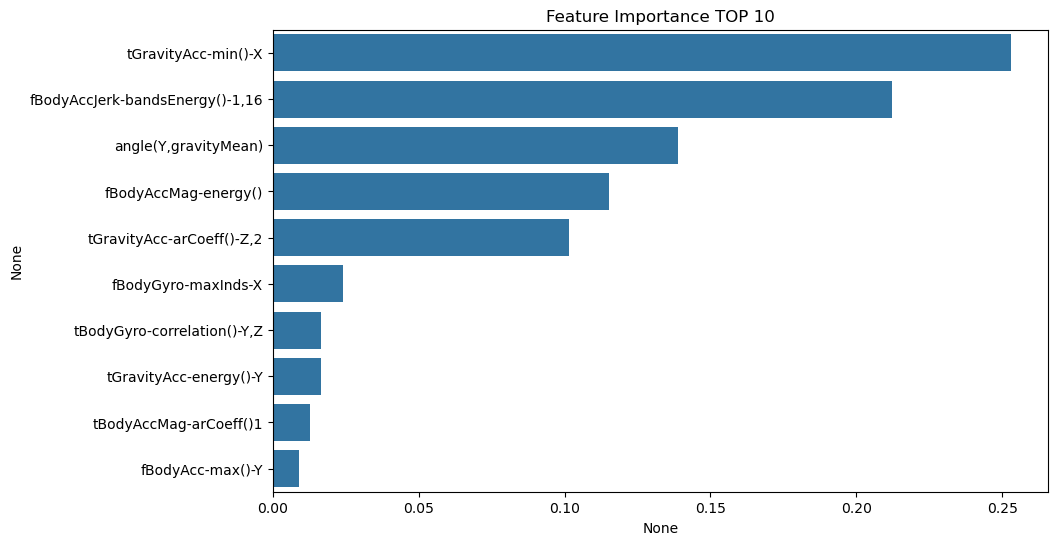

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title('Feature Importance TOP 10')
sns.barplot(x=feature_importance_top10, y=feature_importance_top10.index)
plt.show()

In [56]:
# !pip install graphviz

In [57]:
from sklearn.tree import export_graphviz

In [58]:
export_graphviz(best_dt, out_file='best_tree.dot', class_names=label_name, feature_names=feature_name, filled=True)

In [60]:
import graphviz

with open('best_tree.dot') as file:
    dot_tree = file.read()

graphviz.Source(dot_tree)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH